#### Import Libraries

In [3]:
#Basic libraries
import pandas as pd 
import numpy as np

#visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#pre processing libararies
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

#classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

#metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve,auc

#to save the model
import pickle
import json

#warning 
import warnings
warnings.filterwarnings("ignore")



#### Load dataset

In [91]:
df = pd.read_csv(r"C:\Users\vishal\OneDrive\Desktop\Myfiles\Projects-DS\data\customer_churn_business_dataset.csv")
df.head()

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0


In [93]:
df[0:1]

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.35436,Service,4.0,0,0.71,0.4,27,Satisfied,1,0


In [5]:
print(df.shape)
print(df.columns)

(10000, 32)
Index(['customer_id', 'gender', 'age', 'country', 'city', 'customer_segment',
       'tenure_months', 'signup_channel', 'contract_type', 'monthly_logins',
       'weekly_active_days', 'avg_session_time', 'features_used',
       'usage_growth_rate', 'last_login_days_ago', 'monthly_fee',
       'total_revenue', 'payment_method', 'payment_failures',
       'discount_applied', 'price_increase_last_3m', 'support_tickets',
       'avg_resolution_time', 'complaint_type', 'csat_score', 'escalations',
       'email_open_rate', 'marketing_click_rate', 'nps_score',
       'survey_response', 'referral_count', 'churn'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  object 
 1   gender                  10000 non-null  object 
 2   age                     10000 non-null  int64  
 3   country                 10000 non-null  object 
 4   city                    10000 non-null  object 
 5   customer_segment        10000 non-null  object 
 6   tenure_months           10000 non-null  int64  
 7   signup_channel          10000 non-null  object 
 8   contract_type           10000 non-null  object 
 9   monthly_logins          10000 non-null  int64  
 10  weekly_active_days      10000 non-null  int64  
 11  avg_session_time        10000 non-null  float64
 12  features_used           10000 non-null  int64  
 13  usage_growth_rate       10000 non-null  float64
 14  last_login_days_ago     10000 non-null 

In [7]:
df.describe()

,age,tenure_months,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,payment_failures,support_tickets,avg_resolution_time,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,referral_count,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,45.906100,30.155700,19.672000,3.479400,15.187890,4.990800,0.019423,9.505200,34.930000,1057.018000,0.501000,1.206600,23.953210,3.486700,0.294100,0.499610,0.253575,19.110500,0.9922,0.102100
std,16.420416,17.099517,9.838003,2.302283,6.830774,2.211607,0.149567,9.799417,23.785115,1020.148233,0.711934,1.104554,9.956999,0.978631,0.543171,0.231601,0.140532,38.936619,0.9939,0.302795
min,18.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-0.580000,0.000000,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.100000,0.010000,-100.000000,0.0000,0.000000
25%,32.000000,16.000000,13.000000,1.000000,10.391645,3.000000,-0.080000,2.000000,20.000000,340.000000,0.000000,0.000000,17.082041,3.000000,0.000000,0.300000,0.130000,-7.000000,0.0000,0.000000
50%,46.000000,30.000000,20.000000,3.000000,15.161659,5.000000,0.020000,6.000000,30.000000,720.000000,0.000000,1.000000,23.950444,4.000000,0.000000,0.500000,0.250000,19.000000,1.0000,0.000000
75%,60.000000,45.000000,26.000000,5.000000,19.882034,6.000000,0.120000,13.000000,50.000000,1440.000000,1.000000,2.000000,30.758480,4.000000,1.000000,0.700000,0.380000,46.000000,2.0000,0.000000
max,74.000000,59.000000,54.000000,7.000000,41.996411,15.000000,0.540000,80.000000,100.000000,5900.000000,5.000000,7.000000,61.821878,5.000000,4.000000,0.900000,0.500000,100.000000,7.0000,1.000000


In [8]:
df.isnull().sum()

customer_id                  0
gender                       0
age                          0
country                      0
city                         0
customer_segment             0
tenure_months                0
signup_channel               0
contract_type                0
monthly_logins               0
weekly_active_days           0
avg_session_time             0
features_used                0
usage_growth_rate            0
last_login_days_ago          0
monthly_fee                  0
total_revenue                0
payment_method               0
payment_failures             0
discount_applied             0
price_increase_last_3m       0
support_tickets              0
avg_resolution_time          0
complaint_type            2045
csat_score                   0
escalations                  0
email_open_rate              0
marketing_click_rate         0
nps_score                    0
survey_response              0
referral_count               0
churn                        0
dtype: i

In [9]:
df["complaint_type"].value_counts()

complaint_type
Technical    3498
Billing      2427
Service      2030
Name: count, dtype: int64

In [10]:
df["complaint_type"].isna().sum()

2045

In [11]:
#fill na of the categorical col with mode value
cat_col = df.select_dtypes(include=["object"]).columns
df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0])

In [12]:
num_col = df.select_dtypes(include=["int64","float64"]).columns


In [13]:
df["complaint_type"].head()


0      Service
1      Billing
2      Service
3    Technical
4    Technical
Name: complaint_type, dtype: object

In [14]:
df.isnull().sum()

customer_id               0
gender                    0
age                       0
country                   0
city                      0
customer_segment          0
tenure_months             0
signup_channel            0
contract_type             0
monthly_logins            0
weekly_active_days        0
avg_session_time          0
features_used             0
usage_growth_rate         0
last_login_days_ago       0
monthly_fee               0
total_revenue             0
payment_method            0
payment_failures          0
discount_applied          0
price_increase_last_3m    0
support_tickets           0
avg_resolution_time       0
complaint_type            0
csat_score                0
escalations               0
email_open_rate           0
marketing_click_rate      0
nps_score                 0
survey_response           0
referral_count            0
churn                     0
dtype: int64

In [15]:
df.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

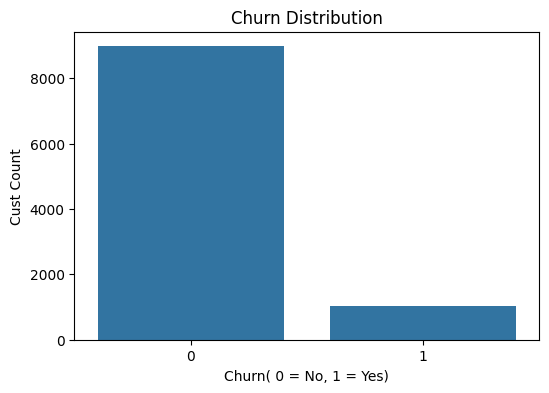

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x = "churn",data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn( 0 = No, 1 = Yes)")
plt.ylabel("Cust Count")
plt.show

In [17]:
df["churn"].value_counts(normalize=True) *100

churn
0    89.79
1    10.21
Name: proportion, dtype: float64

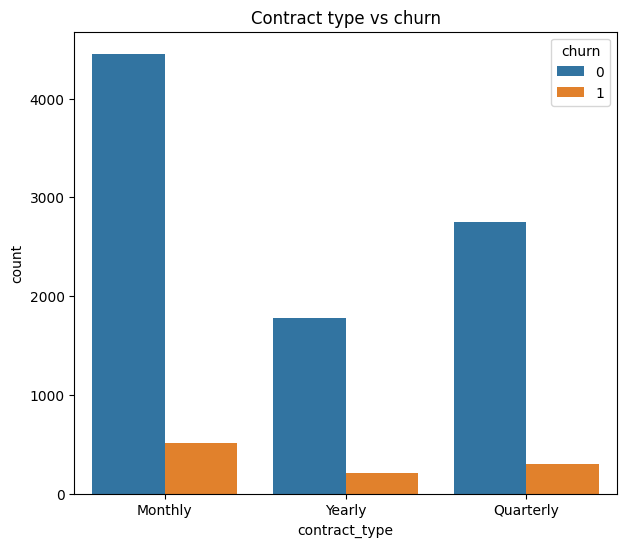

In [18]:
plt.figure(figsize=(7,6))
sns.countplot(x= "contract_type",hue="churn",data=df)
plt.title("Contract type vs churn")
plt.show()

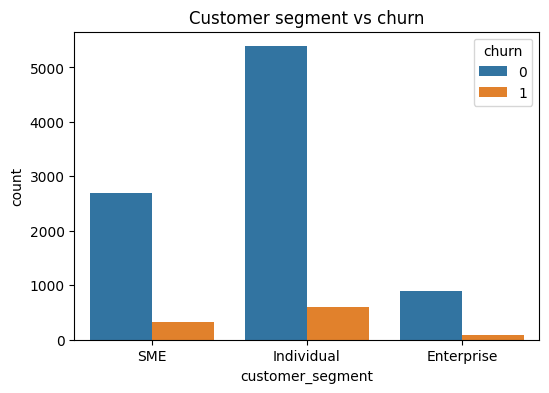

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x= "customer_segment",data=df,hue="churn")
plt.title("Customer segment vs churn")
plt.show()

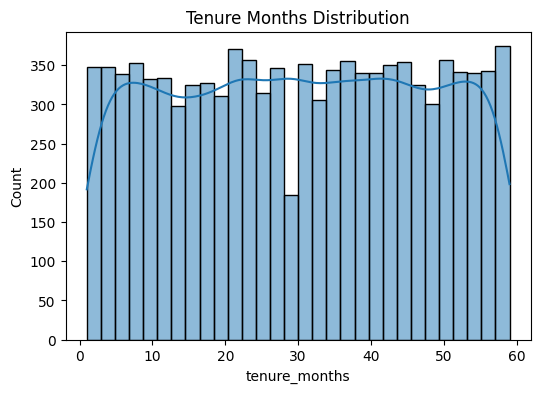

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df["tenure_months"],bins=30,kde=True)
plt.title("Tenure Months Distribution")
plt.show()

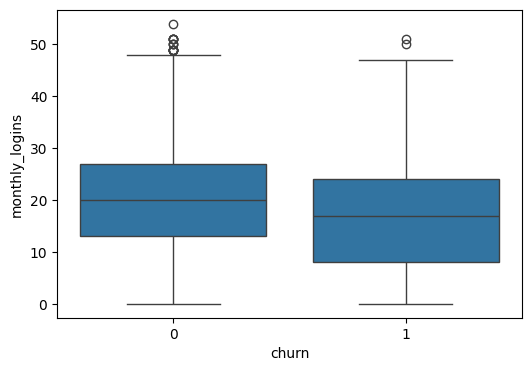

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn",y="monthly_logins",data=df)
plt.show()

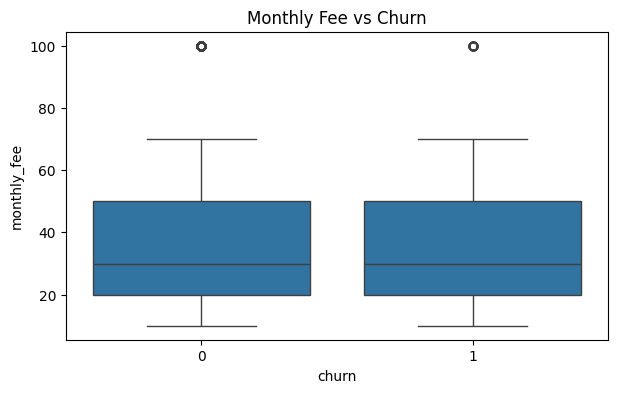

In [22]:
plt.figure(figsize=(7,4))
sns.boxplot(x="churn", y="monthly_fee", data=df)
plt.title("Monthly Fee vs Churn")
plt.show()

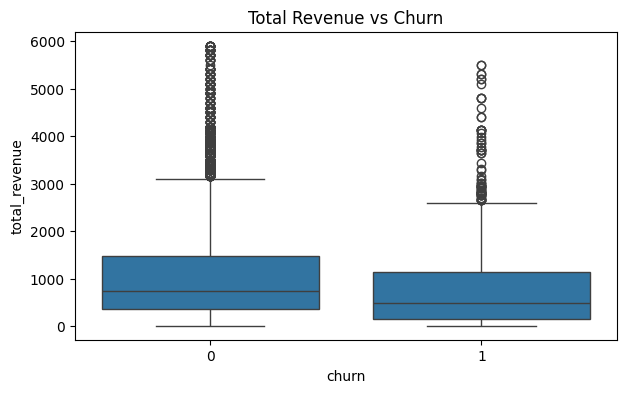

In [23]:
plt.figure(figsize=(7,4))
sns.boxplot(x="churn", y="total_revenue", data=df)
plt.title("Total Revenue vs Churn")
plt.show()

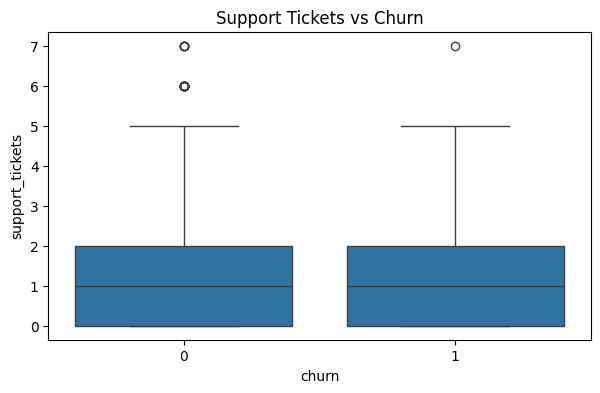

In [24]:
plt.figure(figsize=(7,4))
sns.boxplot(x="churn", y="support_tickets", data=df)
plt.title("Support Tickets vs Churn")
plt.show()

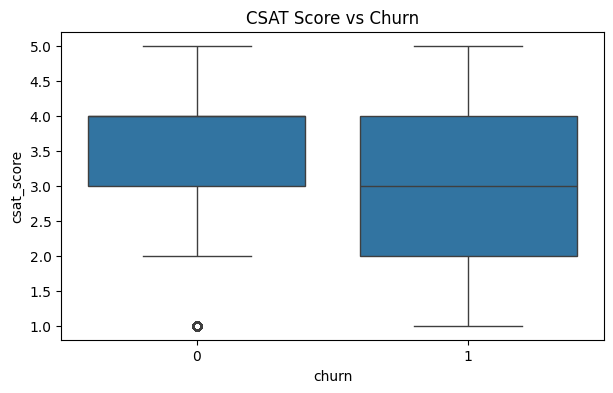

In [25]:
plt.figure(figsize=(7,4))
sns.boxplot(x="churn", y="csat_score", data=df)
plt.title("CSAT Score vs Churn")
plt.show()

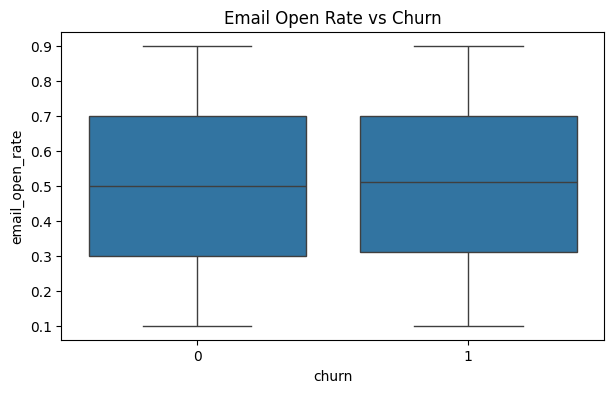

In [26]:
plt.figure(figsize=(7,4))
sns.boxplot(x="churn", y="email_open_rate", data=df)
plt.title("Email Open Rate vs Churn")
plt.show()

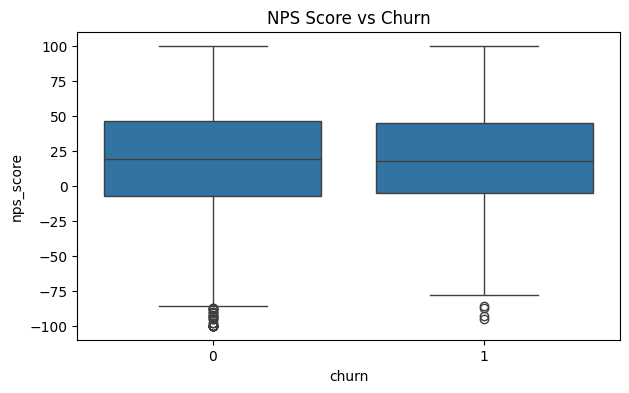

In [27]:
plt.figure(figsize=(7,4))
sns.boxplot(x="churn", y="nps_score", data=df)
plt.title("NPS Score vs Churn")
plt.show()

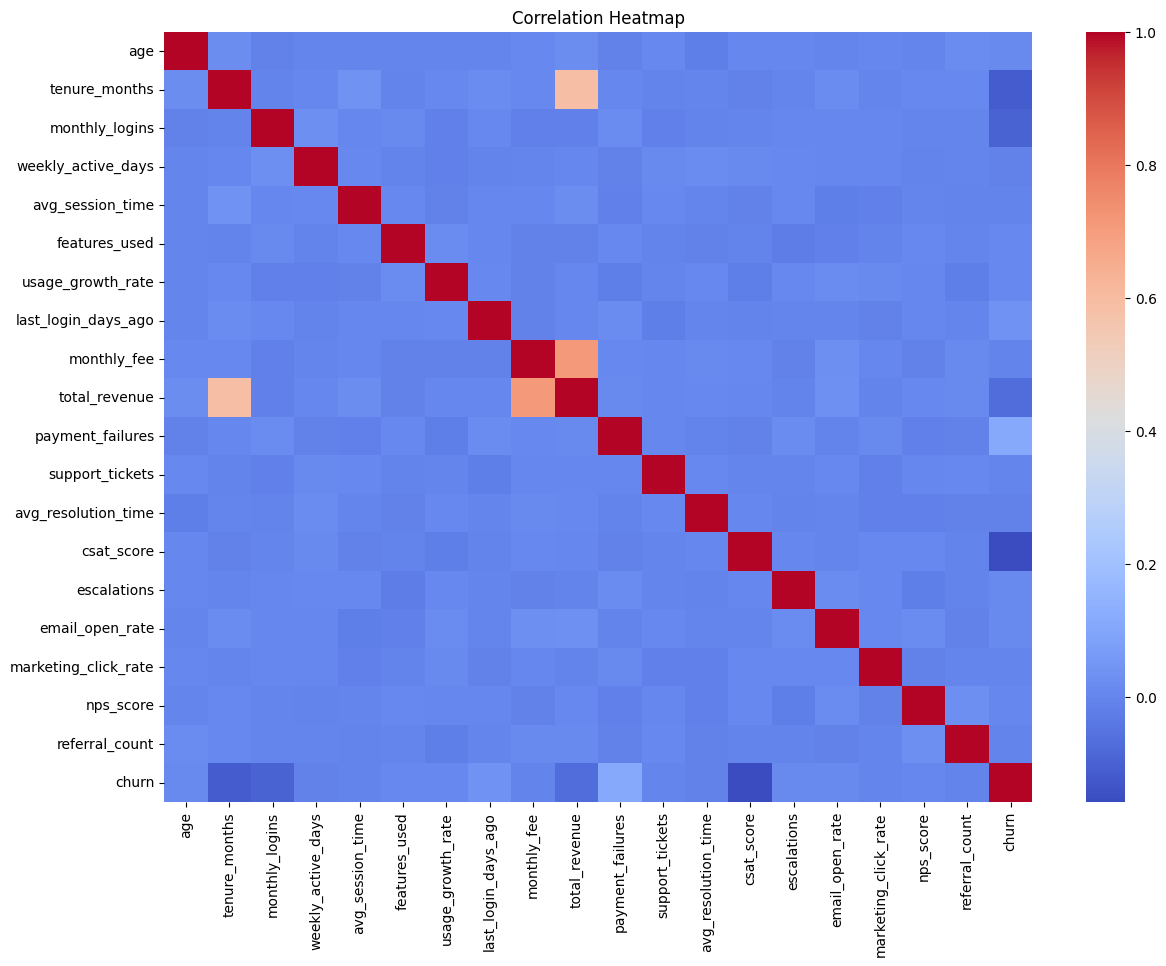

In [28]:
plt.figure(figsize=(14,10))
corr = df[num_col].corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [29]:
#remove outliers from the data 

def remove_outlier_iqr(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1-1.5 * iqr
    upper_tail = q3+1.5*iqr

    data[col] = data[col].clip(lower_tail,upper_tail)
    return data
    

In [30]:
for col in ["monthly_logins", "avg_session_time", "total_revenue"]:
    df= remove_outlier_iqr(df,col)

In [31]:
#adding new features in the data 
df["avg_revenue_per_month"] = df["total_revenue"] / df["tenure_months"]
df["engagement_score"] = (
    df["monthly_logins"] * 0.4 +
    df["weekly_active_days"] * 0.3 +
    df["email_open_rate"] * 10
)


In [32]:
#data spliting 
x = df.drop(columns=["customer_id", "churn"])
y = df["churn"]

In [33]:
print("Total columns:", df.shape[1])
print("X columns:", x.shape[1])
print("y shape:", y.shape)

Total columns: 34
X columns: 32
y shape: (10000,)


In [34]:
categorical_col = x.select_dtypes(include=["object"]).columns
numerical_col = x.select_dtypes(include= ["int64","float64"]).columns
print(f" Categorical col : \n {categorical_col}")
print(f" Numerical col : \n {numerical_col}")

 Categorical col : 
 Index(['gender', 'country', 'city', 'customer_segment', 'signup_channel',
       'contract_type', 'payment_method', 'discount_applied',
       'price_increase_last_3m', 'complaint_type', 'survey_response'],
      dtype='object')
 Numerical col : 
 Index(['age', 'tenure_months', 'monthly_logins', 'weekly_active_days',
       'avg_session_time', 'features_used', 'usage_growth_rate',
       'last_login_days_ago', 'monthly_fee', 'total_revenue',
       'payment_failures', 'support_tickets', 'avg_resolution_time',
       'csat_score', 'escalations', 'email_open_rate', 'marketing_click_rate',
       'nps_score', 'referral_count', 'avg_revenue_per_month',
       'engagement_score'],
      dtype='object')


In [35]:
df.columns = df.columns.str.strip()

categorical_col = df.select_dtypes(include=["object","category"]).columns
print(f"Categorical col : \n {categorical_col}")


#use leable incoding 

le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col].astype(str))


df.head()

Categorical col : 
 Index(['customer_id', 'gender', 'country', 'city', 'customer_segment',
       'signup_channel', 'contract_type', 'payment_method', 'discount_applied',
       'price_increase_last_3m', 'complaint_type', 'survey_response'],
      dtype='object')


,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn,avg_revenue_per_month,engagement_score
0,0,1,68,1,3,2,22,2,0,26.0,...,4.0,0,0.71,0.40,27,1,1,0,30.0,19.6
1,1,0,57,2,5,1,9,0,0,7.0,...,2.0,0,0.78,0.33,-19,0,2,1,30.0,12.1
2,2,1,24,3,4,2,58,2,2,19.0,...,3.0,0,0.35,0.49,80,0,1,0,20.0,12.6
3,3,1,49,0,2,1,19,0,2,34.0,...,5.0,1,0.83,0.15,100,0,0,0,30.0,24.0
4,4,1,65,1,1,1,52,2,0,20.0,...,4.0,0,0.65,0.44,21,2,1,0,50.0,16.3


In [36]:
# Separate features and target
X = df.drop('churn', axis=1)
y = df['churn']

In [37]:
#minmax scaling

scalar = MinMaxScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X),columns=X.columns)
X_scaled

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,avg_revenue_per_month,engagement_score
0,0.0000,1.0,0.892857,0.166667,0.500000,1.0,0.362069,1.0,0.0,0.571429,...,0.5,0.75,0.00,0.7625,0.795918,0.635,0.5,0.142857,0.222222,0.665455
1,0.0001,0.0,0.696429,0.333333,0.833333,0.5,0.137931,0.0,0.0,0.153846,...,0.0,0.25,0.00,0.8500,0.653061,0.405,0.0,0.285714,0.222222,0.392727
2,0.0002,1.0,0.107143,0.500000,0.666667,1.0,0.982759,1.0,1.0,0.417582,...,0.5,0.50,0.00,0.3125,0.979592,0.900,0.0,0.142857,0.111111,0.410909
3,0.0003,1.0,0.553571,0.000000,0.333333,0.5,0.310345,0.0,1.0,0.747253,...,1.0,1.00,0.25,0.9125,0.285714,1.000,0.0,0.000000,0.222222,0.825455
4,0.0004,1.0,0.839286,0.166667,0.166667,0.5,0.879310,1.0,0.0,0.439560,...,1.0,0.75,0.00,0.6875,0.877551,0.605,1.0,0.142857,0.444444,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.9996,0.0,0.875000,0.500000,0.833333,1.0,0.620690,1.0,1.0,0.329670,...,0.5,0.75,0.25,0.3250,0.551020,0.600,0.5,0.285714,0.111111,0.323636
9996,0.9997,1.0,0.142857,1.000000,1.000000,0.5,0.706897,0.0,1.0,0.285714,...,1.0,0.75,0.00,0.4750,0.102041,0.640,1.0,0.285714,0.444444,0.338182
9997,0.9998,0.0,0.000000,0.333333,0.833333,0.5,0.655172,0.0,1.0,0.329670,...,1.0,0.00,0.00,0.0125,0.122449,0.350,0.5,0.142857,0.111111,0.276364
9998,0.9999,0.0,0.214286,1.000000,0.166667,0.5,0.879310,1.0,0.0,0.307692,...,1.0,0.25,0.00,0.1875,0.612245,0.790,0.0,0.142857,0.222222,0.247273


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (8000, 33)
Test shape: (2000, 33)


In [39]:
Models = {
    "LogisticRegression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "DecisionTree" : DecisionTreeClassifier(),
    "Adaboost" : AdaBoostClassifier(),
    "RandomForeset" : RandomForestClassifier()
}

In [40]:
Result = []

In [41]:
for name, model in Models.items():
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    clf_report = confusion_matrix(y_test,y_pred)
    train_acc = model.score(X_train,y_train)


        # ROC-AUC
    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = "N/A"
    
    Result.append({
        "Model": name,
        "Accuracy": acc,
        "Confusion_Matrix": cm,
        "Classification_Report": clf_report,
        "ROC_AUC": roc_auc,
        "Training Accuracy":train_acc,
    })


# Convert to DataFrame
results_df = pd.DataFrame(Result)
results_df[['Model', 'Accuracy', 'ROC_AUC','Training Accuracy']]
    

,Model,Accuracy,ROC_AUC,Training Accuracy
0,LogisticRegression,0.8955,0.724538,0.896750
1,KNN,0.8900,0.554326,0.900500
2,DecisionTree,0.8310,0.584360,1.000000
3,Adaboost,0.8970,0.813488,0.896375
4,RandomForeset,0.8975,0.799095,1.000000


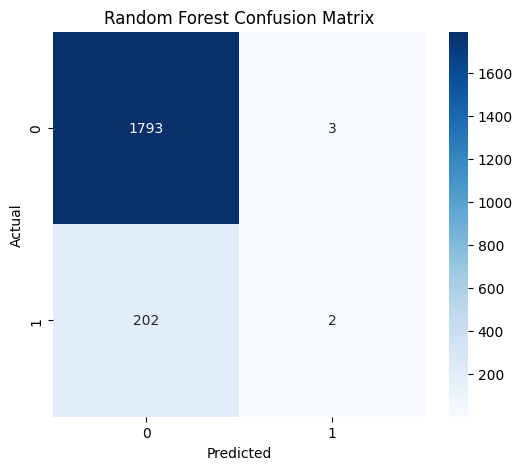

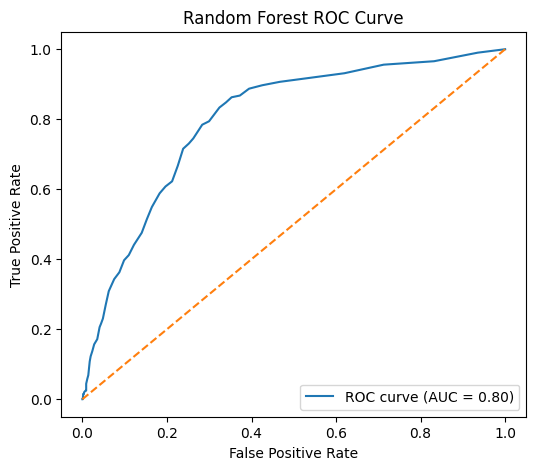

In [42]:
# Confusion Matrix
Model = Models['RandomForeset']
y_pred = Model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.show()

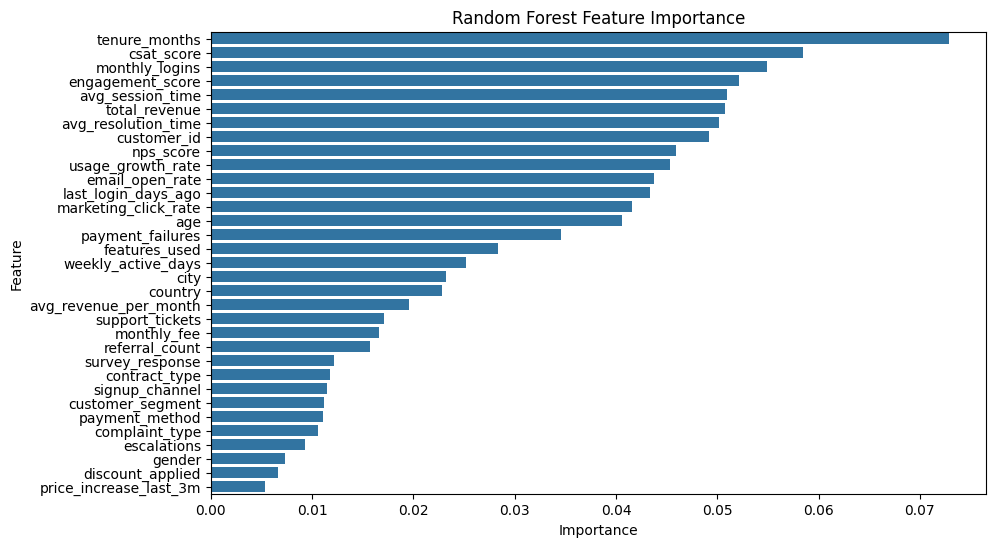

In [43]:
importances = Model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Random Forest Feature Importance")
plt.show()

In [44]:
importances = Model.feature_importances_
importances

array([0.04913077, 0.00733296, 0.04061203, 0.02281184, 0.02321323,
       0.0111735 , 0.07287575, 0.01150667, 0.01175864, 0.0548927 ,
       0.02515954, 0.05095171, 0.02837773, 0.04530136, 0.04337845,
       0.01657384, 0.05080503, 0.0110362 , 0.03459715, 0.00660382,
       0.00538209, 0.01711225, 0.05019333, 0.01062228, 0.05848732,
       0.00933281, 0.04370194, 0.04159789, 0.04592019, 0.01216421,
       0.01570815, 0.01953157, 0.05215305])

In [45]:
feature_name = Model.feature_names_in_

In [46]:
dic1 = dict(zip(feature_name,importances))
dic1

{'customer_id': 0.04913076929141958,
 'gender': 0.007332961040633019,
 'age': 0.04061203199860517,
 'country': 0.022811842157645736,
 'city': 0.02321323166533026,
 'customer_segment': 0.011173501053128225,
 'tenure_months': 0.07287575090794636,
 'signup_channel': 0.011506670789996478,
 'contract_type': 0.011758639355595507,
 'monthly_logins': 0.05489269796345433,
 'weekly_active_days': 0.025159543471759936,
 'avg_session_time': 0.050951708686635434,
 'features_used': 0.02837773308811113,
 'usage_growth_rate': 0.04530135963354472,
 'last_login_days_ago': 0.04337844522712318,
 'monthly_fee': 0.016573843643202434,
 'total_revenue': 0.050805026739598774,
 'payment_method': 0.011036198212227693,
 'payment_failures': 0.03459715070890345,
 'discount_applied': 0.0066038233114536216,
 'price_increase_last_3m': 0.005382086944208355,
 'support_tickets': 0.01711224640783076,
 'avg_resolution_time': 0.05019333425281007,
 'complaint_type': 0.010622279355615692,
 'csat_score': 0.058487318213119616,
 

In [47]:
imp_features = dict()
for fe,imp in enumerate(dic1):
    if dic1[imp] >= 0.03:
        print(f"{imp} with the importance : {dic1[imp]}")
        imp_features.update({imp:dic1[imp]})

customer_id with the importance : 0.04913076929141958
age with the importance : 0.04061203199860517
tenure_months with the importance : 0.07287575090794636
monthly_logins with the importance : 0.05489269796345433
avg_session_time with the importance : 0.050951708686635434
usage_growth_rate with the importance : 0.04530135963354472
last_login_days_ago with the importance : 0.04337844522712318
total_revenue with the importance : 0.050805026739598774
payment_failures with the importance : 0.03459715070890345
avg_resolution_time with the importance : 0.05019333425281007
csat_score with the importance : 0.058487318213119616
email_open_rate with the importance : 0.04370193782438978
marketing_click_rate with the importance : 0.04159788516049695
nps_score with the importance : 0.04592019367698229
engagement_score with the importance : 0.05215305375745115


In [48]:
imp_features

{'customer_id': 0.04913076929141958,
 'age': 0.04061203199860517,
 'tenure_months': 0.07287575090794636,
 'monthly_logins': 0.05489269796345433,
 'avg_session_time': 0.050951708686635434,
 'usage_growth_rate': 0.04530135963354472,
 'last_login_days_ago': 0.04337844522712318,
 'total_revenue': 0.050805026739598774,
 'payment_failures': 0.03459715070890345,
 'avg_resolution_time': 0.05019333425281007,
 'csat_score': 0.058487318213119616,
 'email_open_rate': 0.04370193782438978,
 'marketing_click_rate': 0.04159788516049695,
 'nps_score': 0.04592019367698229,
 'engagement_score': 0.05215305375745115}

In [49]:
sorted_imp = dict(
    sorted(imp_features.items(),key=lambda x :x[1],reverse=True)
)

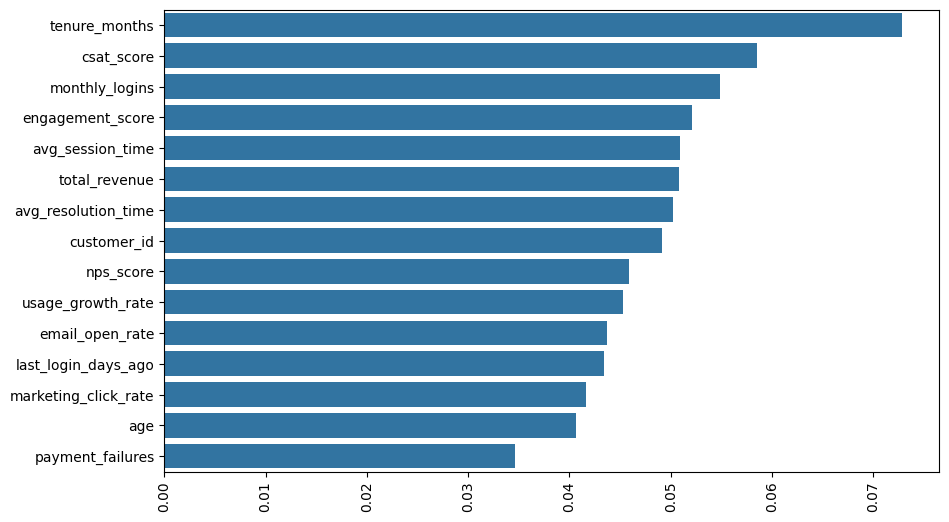

In [50]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x = list(sorted_imp.values()) ,y=list(sorted_imp.keys()),data=sorted_imp)
plt.xticks(rotation=90)
plt.show()

In [51]:
sorted_imp.keys()

dict_keys(['tenure_months', 'csat_score', 'monthly_logins', 'engagement_score', 'avg_session_time', 'total_revenue', 'avg_resolution_time', 'customer_id', 'nps_score', 'usage_growth_rate', 'email_open_rate', 'last_login_days_ago', 'marketing_click_rate', 'age', 'payment_failures'])

In [52]:
X_new = X_scaled
X_new.head()

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,avg_revenue_per_month,engagement_score
0,0.0000,1.0,0.892857,0.166667,0.500000,1.0,0.362069,1.0,0.0,0.571429,...,0.5,0.75,0.00,0.7625,0.795918,0.635,0.5,0.142857,0.222222,0.665455
1,0.0001,0.0,0.696429,0.333333,0.833333,0.5,0.137931,0.0,0.0,0.153846,...,0.0,0.25,0.00,0.8500,0.653061,0.405,0.0,0.285714,0.222222,0.392727
2,0.0002,1.0,0.107143,0.500000,0.666667,1.0,0.982759,1.0,1.0,0.417582,...,0.5,0.50,0.00,0.3125,0.979592,0.900,0.0,0.142857,0.111111,0.410909
3,0.0003,1.0,0.553571,0.000000,0.333333,0.5,0.310345,0.0,1.0,0.747253,...,1.0,1.00,0.25,0.9125,0.285714,1.000,0.0,0.000000,0.222222,0.825455
4,0.0004,1.0,0.839286,0.166667,0.166667,0.5,0.879310,1.0,0.0,0.439560,...,1.0,0.75,0.00,0.6875,0.877551,0.605,1.0,0.142857,0.444444,0.545455


In [53]:
for i in X_scaled.columns:
   if i not in sorted_imp.keys():
      X_new = X_new.drop(i,axis=1)
        

In [54]:
X_new.shape

(10000, 15)

In [55]:
X_new.head()

,customer_id,age,tenure_months,monthly_logins,avg_session_time,usage_growth_rate,last_login_days_ago,total_revenue,payment_failures,avg_resolution_time,csat_score,email_open_rate,marketing_click_rate,nps_score,engagement_score
0,0.0000,0.892857,0.362069,0.571429,0.324974,0.571429,0.0875,0.211039,0.2,0.203124,0.75,0.7625,0.795918,0.635,0.665455
1,0.0001,0.696429,0.137931,0.153846,0.780442,0.267857,0.0250,0.084416,0.2,0.396898,0.25,0.8500,0.653061,0.405,0.392727
2,0.0002,0.107143,0.982759,0.417582,0.675775,0.633929,0.2875,0.373377,0.4,0.436898,0.50,0.3125,0.979592,0.900,0.410909
3,0.0003,0.553571,0.310345,0.747253,0.701836,0.366071,0.3000,0.181818,0.0,0.417955,1.00,0.9125,0.285714,1.000,0.825455
4,0.0004,0.839286,0.879310,0.439560,0.539662,0.375000,0.0250,0.840909,0.0,0.422127,0.75,0.6875,0.877551,0.605,0.545455


In [56]:
X_new = X_new.drop("customer_id",axis=1	)

In [57]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_new, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train1.shape)
print("Test shape:", X_test1.shape)

Train shape: (8000, 14)
Test shape: (2000, 14)


In [58]:
rf = RandomForestClassifier()
rf.fit(X_train1,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
y_pred_new = rf.predict(X_test1)
acc1 = accuracy_score(y_test,y_pred_new)
cm1 = confusion_matrix(y_test,y_pred_new)
clf_report1 = confusion_matrix(y_test,y_pred_new)

In [60]:
print(acc1)

0.898


In [61]:
rf.score(X_train1,y_train1)

1.0

In [62]:
knn = KNeighborsClassifier()
knn.fit(X_train1,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [63]:
y_pred_new = knn.predict(X_test1)
acc1 = accuracy_score(y_test,y_pred_new)
cm1 = confusion_matrix(y_test,y_pred_new)
clf_report1 = confusion_matrix(y_test,y_pred_new)

In [64]:
print(acc1)

0.893


In [65]:
knn.score(X_train1,y_train)

0.90875

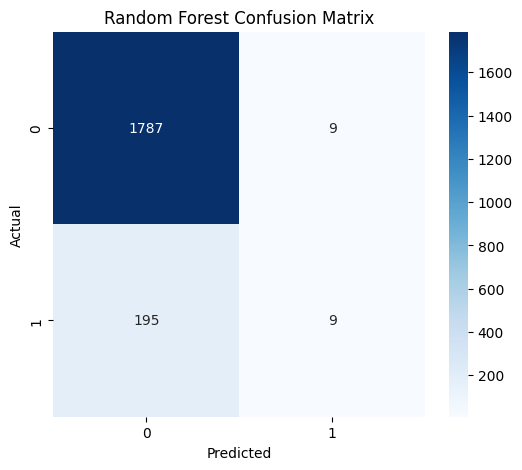

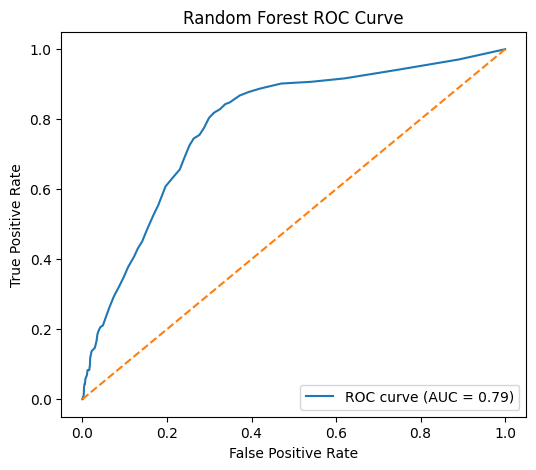

In [66]:
# Confusion Matrix

y_pred_new1 = rf.predict(X_test1)
cm2 = confusion_matrix(y_test, y_pred_new1)

plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_proba_new = rf.predict_proba(X_test1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_new)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.show()

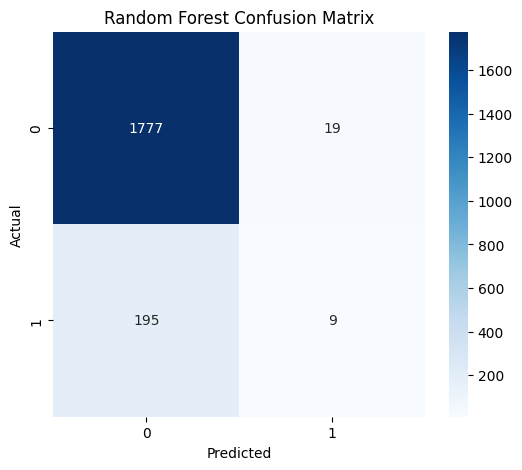

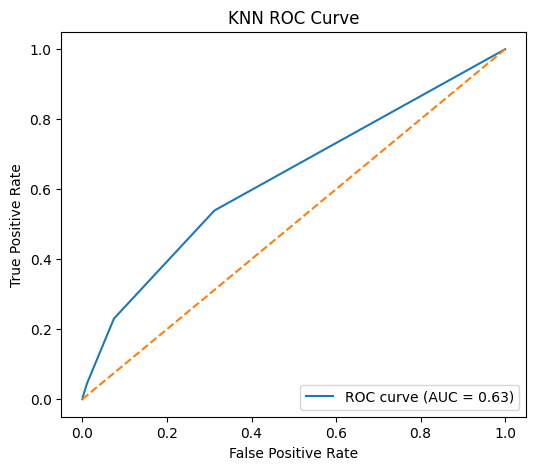

In [67]:
# Confusion Matrix

y_pred_new1 = knn.predict(X_test1)
cm2 = confusion_matrix(y_test, y_pred_new1)

plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_proba_new = knn.predict_proba(X_test1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_new)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [68]:
lg = LogisticRegression()
lg.fit(X_train1,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [69]:
y_pred_new = knn.predict(X_test1)
acc1 = accuracy_score(y_test,y_pred_new)
cm1 = confusion_matrix(y_test,y_pred_new)
clf_report1 = confusion_matrix(y_test,y_pred_new)

In [70]:
print(acc1)

0.893


In [71]:
lg.score(X_train1,y_train)

0.897

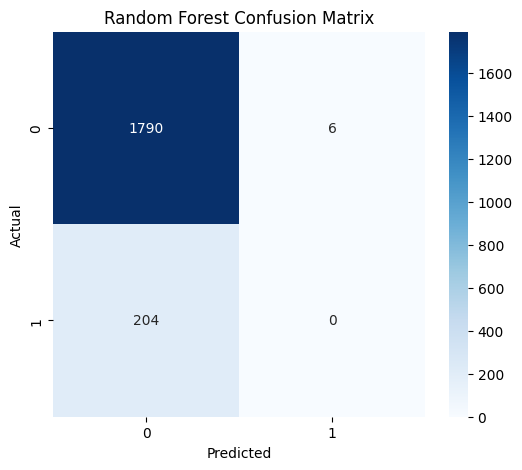

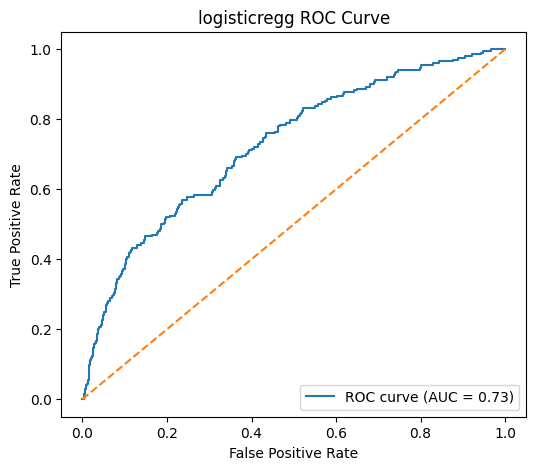

In [72]:
# Confusion Matrix

y_pred_new1 = lg.predict(X_test1)
cm2 = confusion_matrix(y_test, y_pred_new1)

plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_proba_new = lg.predict_proba(X_test1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_new)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("logisticregg ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Testing on User Data

In [73]:
test_df = X_train1[100:101]
test_df

,age,tenure_months,monthly_logins,avg_session_time,usage_growth_rate,last_login_days_ago,total_revenue,payment_failures,avg_resolution_time,csat_score,email_open_rate,marketing_click_rate,nps_score,engagement_score
6968,0.857143,0.241379,0.0,0.413897,0.633929,0.1875,0.483766,0.0,0.321109,0.5,0.4625,0.571429,0.19,0.156364


In [74]:
test2_df = df[100:101]
test2_df

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn,avg_revenue_per_month,engagement_score
100,100,1,71,0,1,1,50,1,2,20.0,...,1.0,0,0.14,0.19,-31,1,0,1,20.0,10.9


In [90]:
df.head()

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn,avg_revenue_per_month,engagement_score


In [76]:
X_train1.columns

Index(['age', 'tenure_months', 'monthly_logins', 'avg_session_time',
       'usage_growth_rate', 'last_login_days_ago', 'total_revenue',
       'payment_failures', 'avg_resolution_time', 'csat_score',
       'email_open_rate', 'marketing_click_rate', 'nps_score',
       'engagement_score'],
      dtype='object')

In [77]:
Model.predict(X_train[4:5])

array([1], dtype=int64)

In [78]:
y_train[4:5]

8440    1
Name: churn, dtype: int64

In [79]:
y_train.head()

3529    0
8625    0
9234    0
5779    0
8440    1
Name: churn, dtype: int64

In [80]:
X_train.shape

(8000, 33)

In [81]:
test_array = np.zeros((1,14))
test_array

    age = int(data["age"])
    tenure_months = int(data["tenure_months"])
    monthly_logins = int(data["monthly_logins"])
    avg_session_time = float(data["avg_session_time"])
    usage_growth_rate = float(data["usage_growth_rate"])
    last_login_days_ago = int(data["last_login_days_ago"])
    total_revenue = float(data["total_revenue"])
    payment_failures = int(data["payment_failures"])
    avg_resolution_time = float(data["avg_resolution_time"])
    csat_score = float(data["csat_score"])
    email_open_rate = float(data["email_open_rate"])
    marketing_click_rate = float(data["marketing_click_rate"])
    nps_score = int(data["nps_score"])
    engagement_score = float(data["engagement_score"])



test_array[0,0] = age
test_array[0,1] = tenure_months
test_array[0,2] = monthly_logins
test_array[0,3] = avg_session_time
test_array[0,4] = usage_growth_rate
test_array[0,5] = last_login_days_ago
test_array[0,6] = total_revenue
test_array[0,7] = payment_failures
test_array[0,8] = avg_resolution_time
test_array[0,9] = csat_score
test_array[0,10] = email_open_rate
test_array[0,11] = marketing_click_rate
test_array[0,12] = nps_score
test_array[0,13] = engagement_score



IndentationError: unexpected indent (2839700480.py, line 4)

In [ ]:
Model.predict(test_arr)

In [ ]:
with open("churn_model.pkl","wb") as f:
    pickle.dump(lg,f)